In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

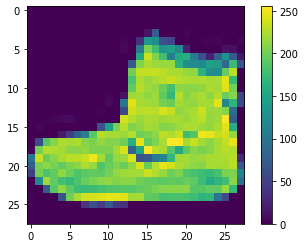

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

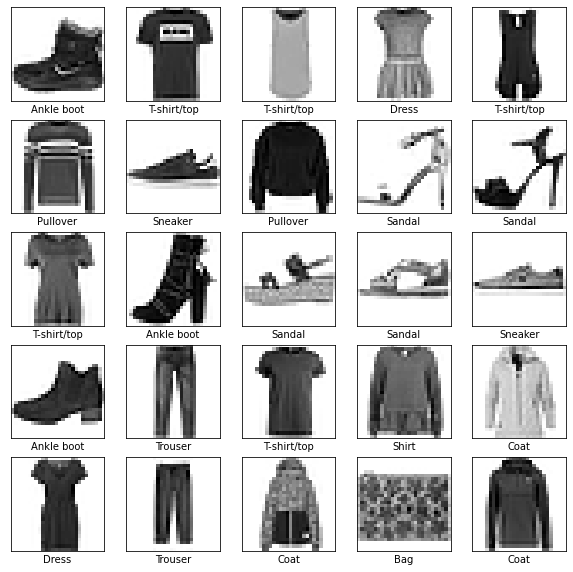

In [14]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),keras.layers.Dense(128,activation=tf.nn.relu),keras.layers.Dense(10,activation = tf.nn.softmax)])

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4977 - accuracy: 0.8247
Epoch 2/5
1875/1875 [==============================] - 2s 969us/step - loss: 0.3767 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 2s 975us/step - loss: 0.3416 - accuracy: 0.8744
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3176 - accuracy: 0.8836
Epoch 5/5
1875/1875 [==============================] - 2s 967us/step - loss: 0.2994 - accuracy: 0.8897


In [21]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 618us/step - loss: 0.3613 - accuracy: 0.8693
Test accuracy: 0.8693000078201294


In [22]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 565us/step


In [23]:
predictions[0]

array([8.3714070e-07, 5.3225019e-10, 6.9036588e-08, 3.7014611e-09,
       2.2612467e-09, 6.3363505e-03, 1.7009459e-07, 4.9992327e-02,
       5.5018309e-06, 9.4366479e-01], dtype=float32)

In [24]:
np.argmax(predictions[0])

9

In [25]:
test_labels[0]

9

In [34]:
def plot_image(i,predictions_array, true_label,img):
    predictions_array,true_label,img = predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color = color)
    

def plot_value_array(i,predictions_array, true_label):
    predictions_array,true_label = predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color = "#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 [==============================] - 0s 560us/step


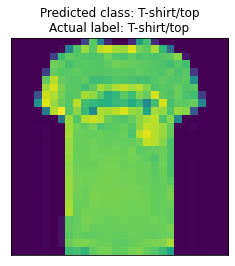

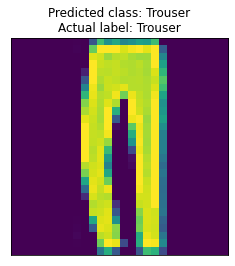

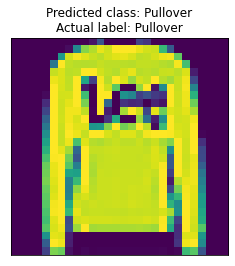

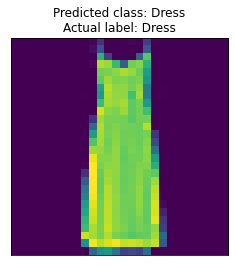

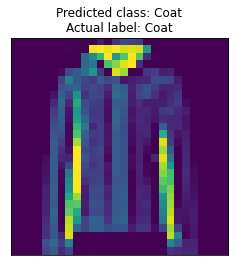

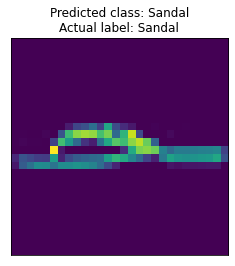

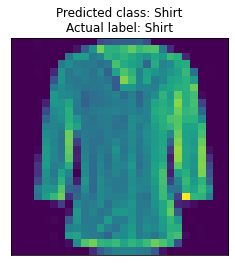

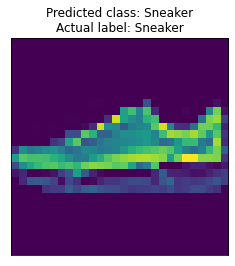

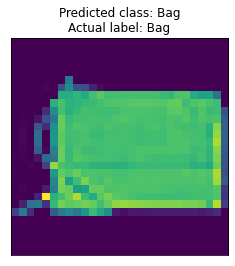

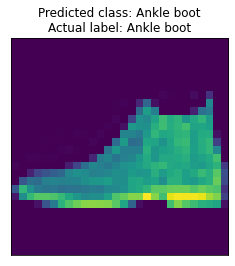

In [28]:
predictions = model.predict(test_images)

predicted_classes = np.argmax(predictions,axis = 1)

for label in range(len(class_names)):
    image_index = np.where(test_labels == label)[0][0]
    
    plt.figure()
    plt.imshow(test_images[image_index])
    plt.title("Predicted class: {}\nActual label: {}".format(class_names[predicted_classes[image_index]], class_names[label]))
    plt.xticks([])
    plt.yticks([])
    plt.show()

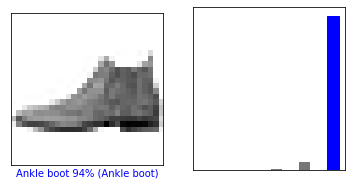

In [35]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions, test_labels)
plt.show()

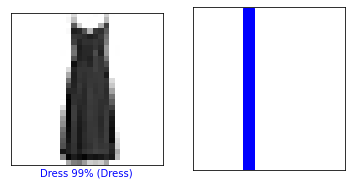

In [36]:
i = 13
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions, test_labels)
plt.show()

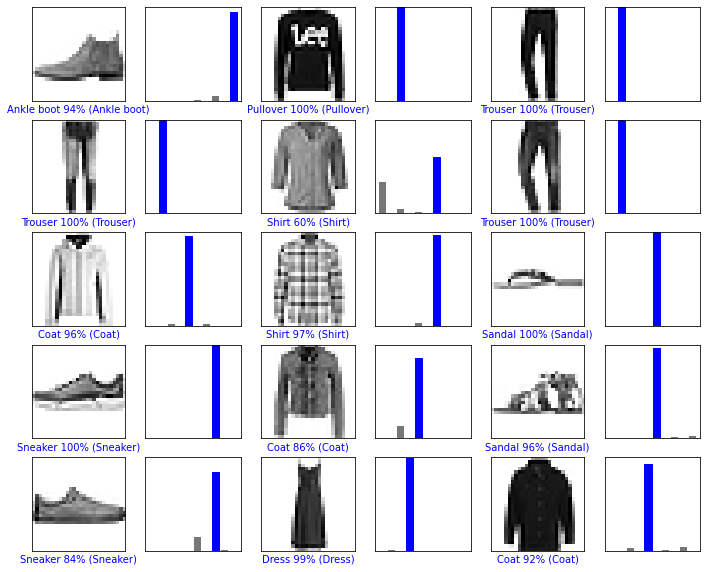

In [37]:
num_rows = 5
num_cols = 3

num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols,2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions,test_labels)
plt.show()
    

In [42]:
img = test_images[0]

print(img.shape)

(28, 28)


In [43]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [44]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 14ms/step
[[8.3714059e-07 5.3224908e-10 6.9036581e-08 3.7014536e-09 2.2612510e-09
  6.3363528e-03 1.7009458e-07 4.9992356e-02 5.5018349e-06 9.4366467e-01]]


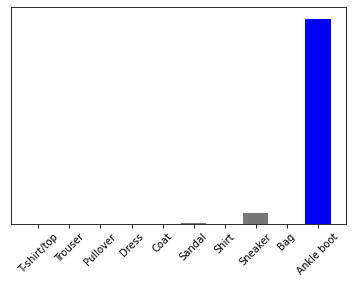

In [45]:
plot_value_array(0,predictions_single,test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)

In [46]:
np.argmax(predictions_single[0])

9